Project Description : CV task with objective to detect number of people in the images provided. The CV task is trained using Yolo3_darknet53_coco model (A famous model for object detection & fast in processing speed).

### 1. Import Dependencies Library

In [0]:
import mxnet as mx
from mxnet import image
from mxnet.gluon.data.vision import transforms
import gluoncv as gcv
import hashlib
from pylab import rcParams
from matplotlib import pyplot as plt
from gluoncv import model_zoo, data, utils
import numpy as np
import os
import glob
from pathlib import Path

rcParams['figure.figsize'] = 5, 10

##### Look at number of available models in the library

In [4]:
for model in gcv.model_zoo.get_model_list():
    print(model)

resnet18_v1
resnet34_v1
resnet50_v1
resnet101_v1
resnet152_v1
resnet18_v2
resnet34_v2
resnet50_v2
resnet101_v2
resnet152_v2
se_resnet18_v1
se_resnet34_v1
se_resnet50_v1
se_resnet101_v1
se_resnet152_v1
se_resnet18_v2
se_resnet34_v2
se_resnet50_v2
se_resnet101_v2
se_resnet152_v2
vgg11
vgg13
vgg16
vgg19
vgg11_bn
vgg13_bn
vgg16_bn
vgg19_bn
alexnet
densenet121
densenet161
densenet169
densenet201
squeezenet1.0
squeezenet1.1
googlenet
inceptionv3
xception
xception71
mobilenet1.0
mobilenet0.75
mobilenet0.5
mobilenet0.25
mobilenetv2_1.0
mobilenetv2_0.75
mobilenetv2_0.5
mobilenetv2_0.25
mobilenetv3_large
mobilenetv3_small
mobile_pose_resnet18_v1b
mobile_pose_resnet50_v1b
mobile_pose_mobilenet1.0
mobile_pose_mobilenetv2_1.0
mobile_pose_mobilenetv3_large
mobile_pose_mobilenetv3_small
ssd_300_vgg16_atrous_voc
ssd_300_vgg16_atrous_coco
ssd_300_vgg16_atrous_custom
ssd_512_vgg16_atrous_voc
ssd_512_vgg16_atrous_coco
ssd_512_vgg16_atrous_custom
ssd_512_resnet18_v1_voc
ssd_512_resnet18_v1_coco
ssd_512_re

### 2. Load Model - Yolo3_darknet53_coco

In [6]:
# Specify the selected model to use for object detection

network = gcv.model_zoo.get_model('yolo3_darknet53_coco', pretrained=True)

100%|██████████| 224190/224190 [00:07<00:00, 28165.82KB/s]


### 3. Specify image location for loading

In [0]:
def load_image(filepath):

    return mx.image.imread(filepath)

test_filepath = 'drive/My Drive/Courses_Workshop_Conferences/test/gluoncv_assignment6/32742378405_3ecc8cc958_b.jpg'
test_output = load_image(test_filepath)

##### Display the image before transform

In [0]:
plt.imshow(test_output.asnumpy())
# fig = plt.gcf()
# fig.set_size_inches(14, 14)
# plt.show()

##### Transforming an image 

In [0]:
def transform_image(array):

    norm_image = gcv.data.transforms.presets.yolo.transform_test(array)
    unnorm_image = norm_image[1]
    
    return norm_image[0], unnorm_image

In [0]:
## Keep a copy of unnormalized image to print using numpy later

norm_image, unnorm_image = transform_image(test_output)

##### Display image which unnormalized

### 4. Model Training

In [0]:
def detect(network, data):

    prediction = network(data)  
    class_ids, scores, bounding_boxes = prediction
    
    return class_ids, scores, bounding_boxes
class_ids, scores, bounding_boxes = detect(network, norm_image)

##### Visualize the image with object detected found

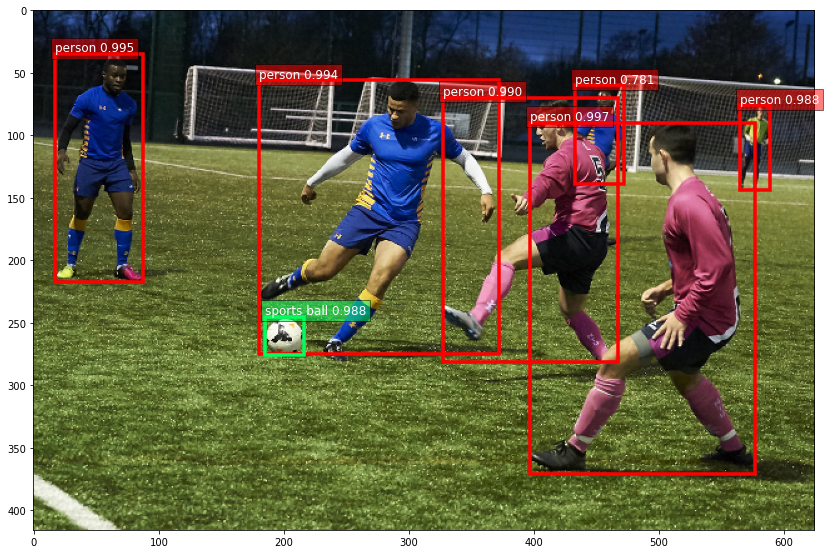

In [13]:
ax = utils.viz.plot_bbox(unnorm_image, bounding_boxes[0], scores[0], class_ids[0], class_names=network.classes)
fig = plt.gcf()
fig.set_size_inches(14, 14)
plt.show()

### 5. Counting object

In [0]:
# import pandas as pd
def count_object(network, class_ids, scores, bounding_boxes, object_label, threshold=0.75):

    object_labels=[]
    for i in range(100):
        if scores[0][i].asnumpy()>threshold:
            iden = class_ids[0][i].asnumpy()[0].astype('int')
            object_labels.append(network.classes[iden])

    counts = 0
    if len(object_labels) >=1:
        for i in object_labels:
            if object_label == i:
                counts+=1
    else:
        pass
    return counts

### 6. Test whether object count is working

In [15]:
for object_label in ["person", "sports ball"]:
    count = count_object(network, class_ids, scores, bounding_boxes, object_label)
    print("{} objects of class '{}' detected".format(count, object_label))

6 objects of class 'person' detected
1 objects of class 'sports ball' detected


In [17]:
num_people = count_object(network, class_ids, scores, bounding_boxes, "person")
num_people

6

In [18]:
thresholds = [0, 0.5, 0.75, 0.9, 0.99, 0.999]
for threshold in thresholds:
    num_people = count_object(network, class_ids, scores, bounding_boxes, "person", threshold=threshold)
    print("{} people detected using a threshold of {}.".format(num_people, threshold))

6 people detected using a threshold of 0.
6 people detected using a threshold of 0.5.
6 people detected using a threshold of 0.75.
5 people detected using a threshold of 0.9.
3 people detected using a threshold of 0.99.
0 people detected using a threshold of 0.999.


### 7. Create a people counter : Detect number of people in the image

In [0]:
class PersonCounter():
    def __init__(self, threshold):
        self._network = gcv.model_zoo.get_model('yolo3_darknet53_coco', pretrained=True)
        self._threshold = threshold

    def set_threshold(self, threshold):
        self._threshold = threshold
    
    def count(self, filepath, visualize=False):
        
        output = mx.image.imread(filepath)
        image = gcv.data.transforms.presets.yolo.transform_test(output)
        unnorm_image = image[0]
        prediction = self._network(unnorm_image)
        class_ids, scores, bounding_boxes = prediction

        object_labels=[]
        for i in range(100):
            if scores[0][i].asnumpy()>self._threshold:
                iden = class_ids[0][i].asnumpy()[0].astype('int')
                object_labels.append(self._network.classes[iden])

        num_people = 0
        if len(object_labels) >=1:
            for i in object_labels:
                if i == "person":
                    num_people+=1
        else:
            pass
        
        if visualize:
            self._visualize(image[1], class_ids, scores, bounding_boxes)
            
        if num_people == 1:
            print('{} person detected in {}.'.format(num_people, filepath)) 
        else:
            print('{} people detected in {}.'.format(num_people, filepath))
        return num_people
    
    def _visualize(self, unnorm_image, class_ids, scores, bounding_boxes):
        """
        Since the transformed_image is in NCHW layout and the values are normalized,
        this method slices and transposes to give CHW as required by matplotlib,
        and scales (-2, +2) to (0, 255) linearly.
        """
        ax = utils.viz.plot_bbox(unnorm_image,
                                 bounding_boxes[0],
                                 scores[0],
                                 class_ids[0],
                                 class_names=self._network.classes)
        fig = plt.gcf()
        fig.set_size_inches(14, 14)
        plt.show()

##### Test whether people counter is working 

In [29]:
counter = PersonCounter(threshold=0.9)

assert counter.count('drive/My Drive/Courses_Workshop_Conferences/test/gluoncv_assignment6/31928213423_090ec29bcf_b.jpg') == 2
assert counter.count('drive/My Drive/Courses_Workshop_Conferences/test/gluoncv_assignment6/32701657536_8a0d9e157f_b.jpg') == 3
assert counter.count('drive/My Drive/Courses_Workshop_Conferences/test/gluoncv_assignment6/25751294956_fa3ee87fb8_b.jpg') == 4

# Try to put in lower threshold for more object detected, but subject to more error
counter.set_threshold(0.5)
# file size to big to print all
# assert counter.count('drive/My Drive/Courses_Workshop_Conferences/test/gluoncv_assignment6/25751294956_fa3ee87fb8_b.jpg', visualize=True) == 6

2 people detected in drive/My Drive/Courses_Workshop_Conferences/test/gluoncv_assignment6/31928213423_090ec29bcf_b.jpg.
3 people detected in drive/My Drive/Courses_Workshop_Conferences/test/gluoncv_assignment6/32701657536_8a0d9e157f_b.jpg.
4 people detected in drive/My Drive/Courses_Workshop_Conferences/test/gluoncv_assignment6/25751294956_fa3ee87fb8_b.jpg.


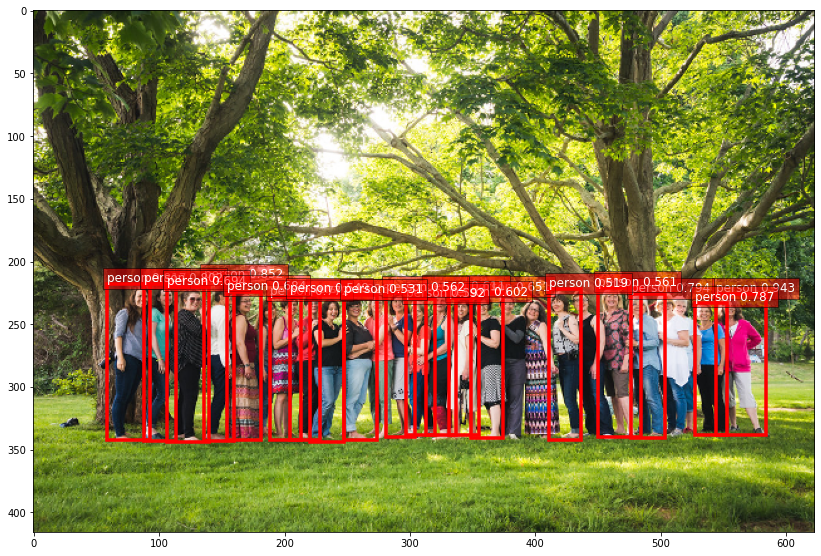

19 people detected in drive/My Drive/Courses_Workshop_Conferences/test/gluoncv_assignment6/18611133536_534285f26d_b.jpg.


19

In [24]:
counter.count('drive/My Drive/Courses_Workshop_Conferences/test/gluoncv_assignment6/18611133536_534285f26d_b.jpg', visualize=True)

##### 8. Task is counting the total number of person in all the available images

In [27]:
total_count = 0
for filepath in glob.glob('drive/My Drive/Courses_Workshop_Conferences/test/gluoncv_assignment6/*.jpg'):
    total_count += counter.count(filepath)
print("### Summary: {} people detected.".format(total_count))

19 people detected in drive/My Drive/Courses_Workshop_Conferences/test/gluoncv_assignment6/18611133536_534285f26d_b.jpg.
6 people detected in drive/My Drive/Courses_Workshop_Conferences/test/gluoncv_assignment6/32742378405_3ecc8cc958_b.jpg.
4 people detected in drive/My Drive/Courses_Workshop_Conferences/test/gluoncv_assignment6/31928213423_090ec29bcf_b.jpg.
3 people detected in drive/My Drive/Courses_Workshop_Conferences/test/gluoncv_assignment6/32701657536_8a0d9e157f_b.jpg.
6 people detected in drive/My Drive/Courses_Workshop_Conferences/test/gluoncv_assignment6/25751294956_fa3ee87fb8_b.jpg.
0 people detected in drive/My Drive/Courses_Workshop_Conferences/test/gluoncv_assignment6/Sitting_malamute_puppy.jpg.
0 people detected in drive/My Drive/Courses_Workshop_Conferences/test/gluoncv_assignment6/6708591927_7f13bf84a0_b.jpg.
3 people detected in drive/My Drive/Courses_Workshop_Conferences/test/gluoncv_assignment6/9480259864_3d7d610e11_b.jpg.
0 people detected in drive/My Drive/Courses